<AxesSubplot:>

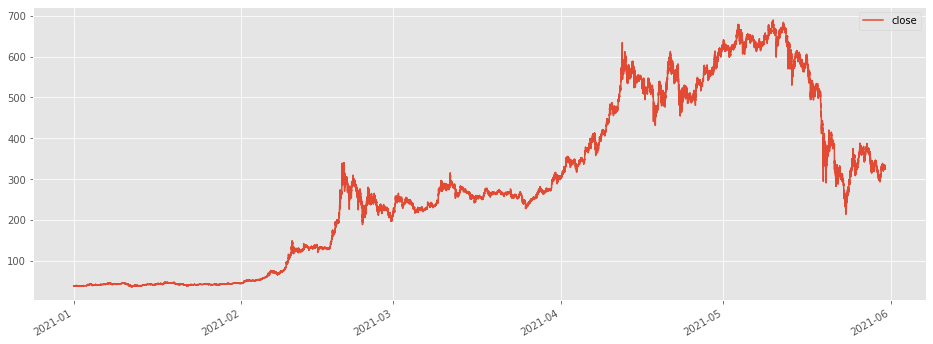

In [107]:
from hypecommons import download_history_fast
from datetime import datetime

df = download_history_fast('BNBBUSD', '20210101000000', freq=3, days=150)

df[['close']].plot()

In [78]:
def technical(df, fast=3, slow=26, rate=2):
    df['vol_ma_fast'] = df['volume'].rolling(window=fast).mean()
    df['vol_ma_slow'] = df['volume'].rolling(window=slow).mean()
    df['close_ma_slow'] = df['close'].rolling(window=slow).mean()
    df['buy_signal'] = (df['vol_ma_fast'] > rate * df['vol_ma_slow']) & (df['close_ma_slow'].diff() > 0)
    df['buy'] = df['buy_signal'] & (~df['buy_signal']).shift(1)
    df['sell'] = (~df['buy_signal']) & df['buy_signal'].shift(1)
    return df

In [79]:
from hypecommons import plt
plt.rcParams["figure.figsize"] = (16, 6)

df_may = df[(datetime(2021, 1, 1, 0, 0) < df.index) & (df.index < datetime(2021, 6, 1, 0, 0))].copy()

def simulate(df_may, fast=9, slow=26, rate=2):

    df_may = technical(df_may, fast=fast, slow=slow, rate=rate)

    df_may['prev_close'] = df_may['close'].shift(1)
    df_may.dropna(inplace=True)
    # df_may[(df_may['buy']) | (df_may['sell'])]

    stake = [1]
    invested = False
    for i, row in df_may.iterrows():
        if invested:
            stake.append(stake[-1] / row['prev_close'] * row['close'])
        else:
            stake.append(stake[-1])
        if row['buy']:
            invested = True
            stake[-1] = stake[-1] * (1 - 0.00075)
        elif row['sell']:
            invested = False
            stake[-1] = stake[-1] * (1 - 0.00075)

    df_may['stake'] = stake[1:]
#     df_may[['close']].plot()
#     plt.show()
#     df_may[['stake']].plot()
#     plt.show()
    return df_may['stake'].iloc[-1]

In [124]:
for r in range(20, 55, 5):
    fast, slow, rate = 9, 200, r/10
    stake = simulate(df_may, fast=fast, slow=slow, rate=rate)
    print((fast, slow, rate, stake, len(df_may[df_may['buy']])))    

(9, 200, 2.0, 0.5908104380569164, 325)
(9, 200, 2.5, 0.7898229926993403, 147)
(9, 200, 3.0, 0.7511503597209916, 87)
(9, 200, 3.5, 0.8374157677986857, 49)
(9, 200, 4.0, 0.8860908755720478, 32)
(9, 200, 4.5, 0.9270407209961076, 18)
(9, 200, 5.0, 0.9632467283063794, 13)


(9, 200, 3.0, 0.7511503597209916, 87)


<AxesSubplot:>

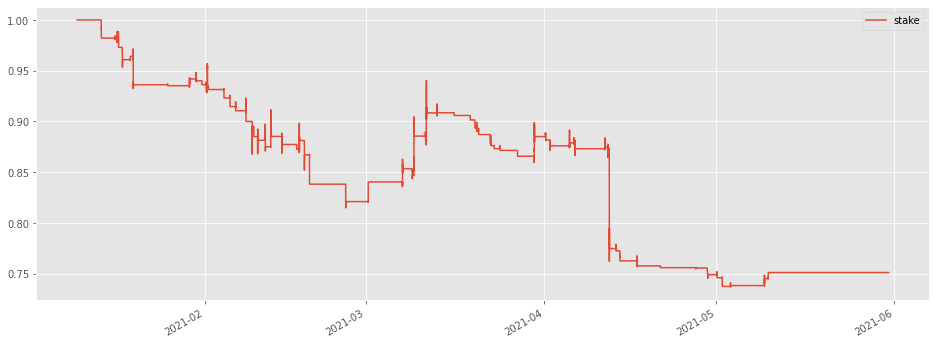

In [123]:
df_may[['stake']].plot()

In [97]:
import pandas as pd
from IPython.display import display

with pd.option_context('display.max_rows', None):
    display(df_may[df_may.index < datetime(2021, 1, 8, 0, 0)])

,open,high,low,close,volume,trades,vol_ma_fast,vol_ma_slow,close_ma_slow,buy_signal,buy,sell,prev_close,stake
2021-01-07 15:15:00,44.0451,44.1454,43.9852,43.9907,3821.48,369,3098.053333,1953.3861,43.897048,False,False,False,44.0654,1.000000
2021-01-07 15:18:00,43.9974,44.0696,43.9868,44.0304,818.95,202,2632.090000,1839.1654,43.903073,False,False,False,43.9907,1.000000
2021-01-07 15:21:00,44.0214,44.1221,44.0058,44.1023,1157.05,188,1932.493333,1836.8100,43.909885,False,False,False,44.0304,1.000000
2021-01-07 15:24:00,44.1023,44.1998,44.1023,44.1805,1377.29,152,1117.763333,1838.7430,43.917995,False,False,False,44.1023,1.000000
2021-01-07 15:27:00,44.1885,44.2193,44.1122,44.1515,1888.36,212,1474.233333,1844.0048,43.925912,False,False,False,44.1805,1.000000
2021-01-07 15:30:00,44.1562,44.2930,44.1374,44.2700,1895.29,262,1720.313333,1840.9616,43.933654,False,False,False,44.1515,1.000000
2021-01-07 15:33:00,44.2719,44.4003,44.2582,44.3300,1383.41,285,1722.353333,1851.7964,43.941824,False,False,False,44.2700,1.000000
2021-01-07 15:36:00,44.3300,44.3710,44.2959,44.3684,1696.77,257,1658.490000,1846.4380,43.948896,False,False,False,44.3300,1.000000
2021-01-07 15:39:00,44.3390,44.3877,44.3058,44.3877,736.33,167,1272.170000,1846.1730,43.958516,False,False,False,44.3684,1.000000
2021-01-07 15:42:00,44.3877,44.4400,44.3423,44.3985,10696.13,423,4376.410000,1944.6961,43.969001,True,True,False,44.3877,0.999250
